In [4]:
datapath='/home/yangsong/sqlResult_1558435.csv'
from gensim.models import Word2Vec
import pandas as pd
from gensim.models.word2vec import LineSentence 
import jieba
import re
import multiprocessing

data=pd.read_csv(datapath,encoding='gb18030')
content = data.fillna('')
news_content=content['content'].tolist()

In [5]:
with open('content','w',encoding='utf-8') as f:
    for s in news_content:
        s=re.findall(r'[\d\w]+',str(s))
        s=''.join(s)
        f.write(' '.join(jieba.cut(s))+'\n')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.889 seconds.
Prefix dict has been built succesfully.


In [6]:
news_word2ve= Word2Vec(LineSentence('content'), size=35, workers=multiprocessing.cpu_count())

In [ ]:
from collections import defaultdict
def get_related_words(initial_words,model):
    unseen=initial_words
    seen=defaultdict(int)
    maxsize=500
    while unseen and len(unseen)<maxsize:
        node=unseen.pop(0)
        newexpanding=[w for w,s in model.most_similar(node)]
        unseen+=newexpanding
        seen[node]+=1
    return seen

# TFIDF key words

In [31]:
with open('content','r') as f:
    content=f.readlines()

In [32]:
def document_frequency(word):
    return sum([1 for s in content if word in s])

In [33]:
document_frequency('我')

14734

In [34]:
import math

In [35]:
def idf(word):
    return math.log10(len(news_content)/document_frequency(word))

In [36]:
idf('的')<idf('巴基斯坦')

True

In [37]:
def tf(word,document):
    words=document.split()
    return sum([1 for w in words if w==word])

In [38]:
news_content[101]

'中国经济网6月23日讯（记者刘瑾）日前，中国机械工业百强企业、汽车三十强企业名单出炉。在由中国机械工业联合会、中国汽车工业协会主办的“中国机械工业百强企业、汽车工业三十强企业信息发布会”上，中国机械工业联合会会长王瑞祥指出，入围企业总体呈现了持续增长态势，2016年总规模、平均规模均创新高，我国机械工业总体上呈现稳中向好的发展态势，主要经济指标出现恢复性增长。\r\n同时，王瑞祥也表示，机械工业长期积累的结构性矛盾还没有根本性改变，新的发展业态、发展模式远未形成，保持平稳健康发展的基础还不牢固，产业升级、新旧动能转换、实现由大变强任重道远。\r\n相关数据显示，2016年机械百强入围企业规模是15.4亿元，比上年略高。总规模达到16992亿元，平均规模169.92亿元，两项均创新高。相比前两年的前十强排名，名单基本没有什么变化，只是工程机械行业的徐工、三一和中联重科由于之前市场环境等原因，整体排位后移了一两位，但仍全部在十强之列。但考虑到工程机械行业最近以来的强烈增长态势，明年该行业整体恢复性可能较大。\r\n中机联执行副会长陈斌表示，机械百强的年换位率2005年曾高达32%，此后逐年下降，2012年降至6%，不过近几年又在上升，2016年升至22%，说明市场动荡，不确定因素增加。\r\n根据中机联公布的数据，2017年1至5月机械增加值增速好于去年但呈现逐月回落的态势，比如1至5月增速为10.7，比1至4月回落0.2点。此外利润总额也出现了同样的走势。专家分析，这是由于钢铁等原材料价格近期出现较大增幅，使得工业企业成本压力增大。\r\n“产量同比增长表现抢眼的是工程机械类产品，已经有8个月保持高速增长。”同时，陈斌也表示了担忧，比如价格指数缓慢回升但远低于工业、原材料指数，固定资产投资增速仍较低迷，增速在多年回落之后继续在低位震荡徘徊。他表示，行业经济运行仍面临一定的下行压力，机械行业主要服务的钢铁、煤炭、电力及石油、化工等行业普遍处于产业结构深度调整期，其装备需求短期难以大幅增长。还有经过多年的高速发展，各类机械产品的社会保有量均达到了相当规模，对现役设备的更新改造维护已成为需求中的重要部分，这增加了增量回升的难度。\r\n'

In [39]:
tf('汽车',content[101])

2

In [40]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [42]:
content[50]

'EPYC 处理器 将 支持 最高 128 条 PCIE308 通道 DDR4 内存 最高 支持 2TB 的 内存 而 根据 SPEC2006 的 性能 测试 AMD 的 EPYC 处理器 和 同等 定位 的 IntelXeon 处理器 相 比较 的话 性能 领先 幅度 从 20 起步 最高 端的 EPYC7601 领先 幅度 达到 了 47\n'

In [43]:
machine_new_keywords = get_keywords_of_a_ducment(content[200])

## Wordcloud

In [50]:
import wordcloud
import matplotlib.pyplot as plt

In [61]:
fontpath='/home/yangsong/github/datasource/SourceHanSerifSC-Regular.otf'

In [62]:
wc=wordcloud.WordCloud(fontpath)

In [63]:
%matplotlib inline

In [64]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

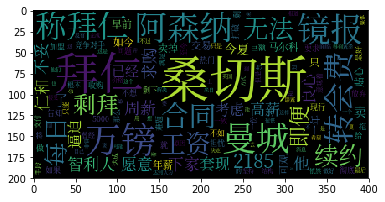

In [65]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [66]:
from PIL import Image
import numpy as np

In [76]:
mask_img = np.array(Image.open('/home/yangsong/wc_mask.png'))

In [77]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path=fontpath, 
mask=mask_img,
background_color='white'
)

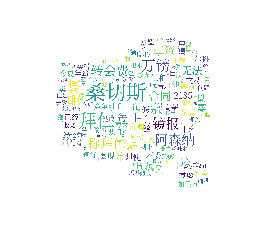

In [79]:
plt.axis('off')
plt.imshow(wordcloud_with_mask.generate_from_frequencies(machine_new_keywords_dict))

## TFIDF Vectorizezd

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
vectorized = TfidfVectorizer(max_features=10000) #不超过此矩阵维度

In [82]:
X = vectorized.fit_transform(content)

In [83]:
X.shape

(89611, 10000)

In [ ]:
vectorized.vocabulary_

In [86]:
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  32,   46,  327,  934,  955, 1555, 1743, 1817, 1839, 2543, 2628,
        2726, 3998, 4144, 4162, 4427, 4533, 4556, 4825, 4892, 5632, 5649,
        5753, 5773, 5819, 5899, 6208, 6902, 7335, 7354, 7626, 7689, 9062,
        9116, 9615]))

In [ ]:
from scipy.spatial.distance import cosine #计算两个向量距离

In [ ]:
def distance(v1, v2): return cosine(v1, v2)

In [ ]:
#查找10000个与X[random_choose]相似文本
sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

## Build Search Engine 

In [90]:
def naive_search(keywords):
    news_ids=[i for i, n in enumerate(content) if all(w in n for w in keywords)]
    return news_ids

In [91]:
%%timeit
naive_search('汽车 工业'.split())

139 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
word_2_id = vectorized.vocabulary_

In [95]:
word_2_id['出版社']

2009

In [99]:
word_2_id['汽车']

6380

In [103]:
#https://stackoverflow.com/questions/16332083/python-memoryerror-when-doing-fitting-with-scikit-learn
#由于声明的矩阵X大小为(89611, 10000)，每个矩阵点占8字节大小，共计89611×10000*8bytes ≈6836MB,本机内存大小为8G
#系统内存管理器直接检测到内存不够用直接抛出错误而未执行程序
transposed_x = X.transpose().toarray()

MemoryError: 

In [ ]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [ ]:
import re
re.compile(pat).sub(repl="**\g<1>**", string=text)
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [ ]:
from IPython.display import display, Markdown

In [ ]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

## PageRank

In [105]:
import networkx as nx
import random
from string import ascii_uppercase

In [106]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [108]:
def genearte_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [110]:
genearte_random_website()

'FHORN.cn'

In [115]:
websites=[genearte_random_website() for _ in range(10)]

In [116]:
websites

['SHAXV.com',
 'ZJAQK.net',
 'RQBDF.com',
 'PZH.cn',
 'LZW.com',
 'UTVK.cn',
 'DLUI.com',
 'FYHK.net',
 'AEB.net',
 'OXJD.net']

In [117]:
random.sample(websites, 10)

['RQBDF.com',
 'LZW.com',
 'PZH.cn',
 'SHAXV.com',
 'FYHK.net',
 'AEB.net',
 'OXJD.net',
 'ZJAQK.net',
 'UTVK.cn',
 'DLUI.com']

In [118]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [119]:
website_network = nx.graph.Graph(website_connection)

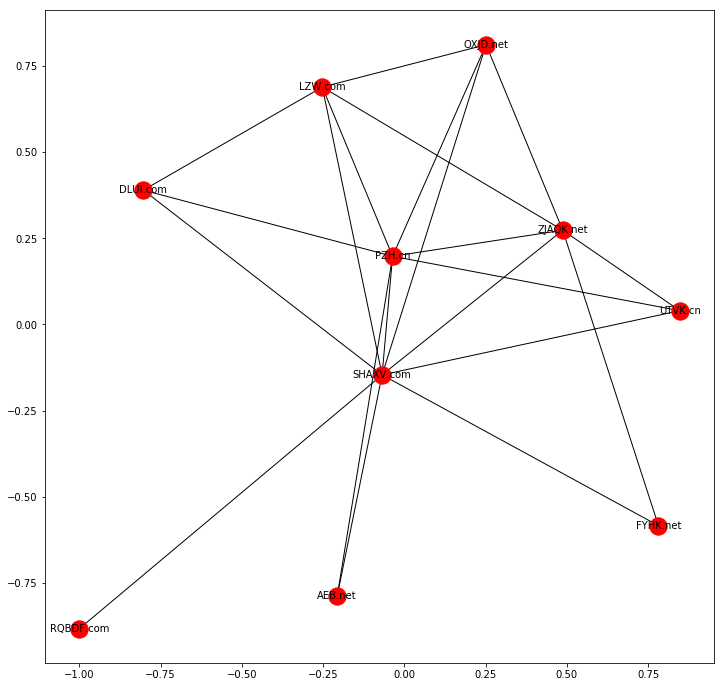

In [120]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [121]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)

[('SHAXV.com', 0.2203910221615709),
 ('PZH.cn', 0.1511418915773348),
 ('ZJAQK.net', 0.13098568662466972),
 ('LZW.com', 0.10965491238892522),
 ('UTVK.cn', 0.08970501759745732),
 ('OXJD.net', 0.0892841312374351),
 ('DLUI.com', 0.07072777577674837),
 ('FYHK.net', 0.05228973650966742),
 ('AEB.net', 0.05208644507721032),
 ('RQBDF.com', 0.03373338104898069)]